<a href="https://colab.research.google.com/github/border-b/QMLHEP/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1) Implement a simple quantum operation with Pennylane**
- With 5 qubits 
- Apply Hadamard operation on every qubit 
- Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4) 
- SWAP (0, 4) 
- Rotate X with pi/2 on any qubit 
- Plot the circuit 

In [ ]:
!pip install pennylane --upgrade
!pip install pennylane-lightning

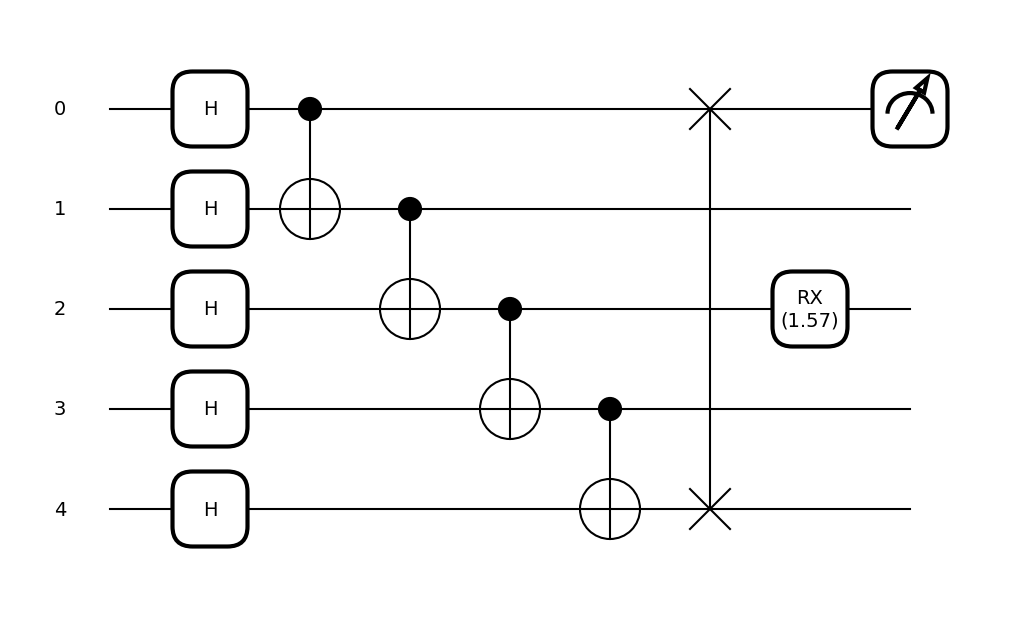

In [2]:
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt

# Defining the circuit
dev = qml.device('default.qubit', wires=5)
@qml.qnode(dev)
def circuit(params):
    qml.broadcast(qml.Hadamard, wires, pattern="single")
    qml.broadcast(qml.CNOT, wires=[0, 1, 2, 3, 4], pattern="chain")
    qml.SWAP(wires=[0, 4])
    qml.RX(params[0], wires=wires[2])
    return qml.expval(qml.PauliZ(wires=wires[0]))

# Initializing the parameters
params = np.array([np.pi/2])
wires = range(5)

# Plotting the circuit
fig, ax = qml.draw_mpl(circuit, decimals=2)(params)
plt.show()

**2) Implement a second circuit with a framework of your choice:**
- Apply a Hadmard gate to the first qubit
- rotate the second qubit by pi/3 around X
- Apply Hadamard gate to the third and fourth qubit
- Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4>


In [ ]:
# Using Qiskit for this task

!pip install qiskit
!pip install pylatexenc

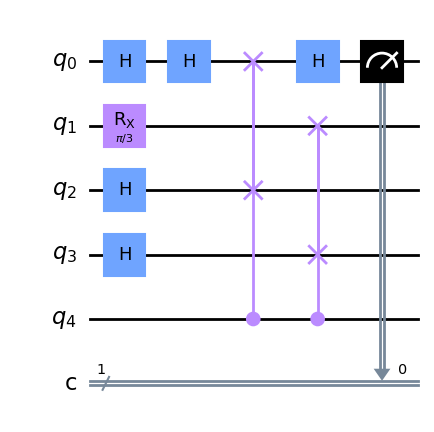

In [6]:
import numpy as np
from qiskit import QuantumCircuit, transpile, Aer, execute, QuantumRegister, ClassicalRegister

swap_test_circuit = QuantumCircuit(4 + 1, 1) # using one ancilla qubit
swap_test_circuit.h(0)
swap_test_circuit.rx(np.pi/3, 1)
swap_test_circuit.h(2)
swap_test_circuit.h(3)

swap_test_circuit.h(0)
for i in range(2):
    swap_test_circuit.cswap(4, i, i+2)
swap_test_circuit.h(0)
swap_test_circuit.measure([0],[0])

swap_test_circuit.draw('mpl')

In [9]:
shots = 8192 #Number of shots
#Execute the circuit in the qasm_simulator
job = execute( swap_test_circuit, Aer.get_backend('qasm_simulator'),shots=shots )
counts = job.result().get_counts() #Count the results of the execution
if '1' in counts:
    m = counts['1']
else:
    m = 0
print("Fidelity of the two states |q1 q2> and |q3 q4>: ", 1-2*m/shots)

Fidelity of the two states |q1 q2> and |q3 q4>:  0.0048828125
